# Demo: Overfitting, Weight-Regularization

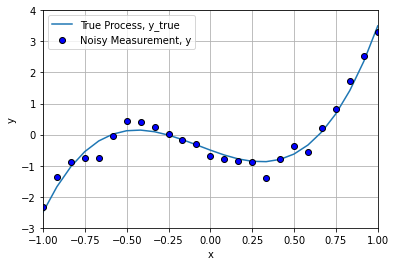

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

nsamp = 25 # number of samples taken
p = np.array([5,1,-2,-.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

In [2]:
# train test validation split
ntrain = 15
nval = 5
ntest = 5

inds = np.random.permutation(nsamp)

train_choices = inds[:ntrain]
val_choices = inds[ntrain:ntrain+nval]
test_choices = inds[ntrain+nval:]

xtrain, ytrain = x[train_choices], y[train_choices]
xval, yval     = x[val_choices], y[val_choices]
xtest, ytest   = x[test_choices], y[test_choices]

In [3]:
# forming the design matrix
# features x, model order M

def design_matrix(x, M):
    x = x.reshape(-1,1)
    bias_col = np.ones((x.shape[0], 1))
    PhiX = bias_col
    for i in np.arange(1, M+1):
        PhiX = np.hstack([PhiX, x ** i])
    return PhiX


M = 25
Xtrain = design_matrix(xtrain, M)
print(Xtrain.shape)

(15, 26)


Train RMSE = 0.0000
Test RMSE = 119.0419


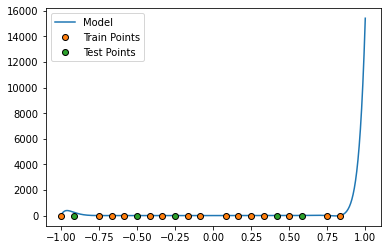

w = 
[[   -0.54]
 [   -3.49]
 [   -2.9 ]
 [   77.01]
 [  180.23]
 [ -994.52]
 [-2295.3 ]
 [ 3820.52]
 [ 8910.18]
 [-3171.32]
 [-7860.71]
 [-1282.96]
 [-5952.58]
 [ -880.04]
 [  616.01]
 [ -705.93]
 [ 4188.85]
 [  140.55]
 [ 4591.93]
 [ 1334.71]
 [ 3382.44]
 [ 2431.3 ]
 [ 1735.49]
 [ 3229.14]
 [  219.24]
 [ 3719.67]]


In [4]:
from sklearn import linear_model

# fitting the model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(Xtrain, ytrain)
w = reg.coef_

# training error
yhat = reg.predict(Xtrain)
RMSE = np.sqrt( np.mean((ytrain-yhat)**2) )
print("Train RMSE = %.4f" % RMSE)

# test error
Xtest = design_matrix(xtest, M)
yhat = reg.predict(Xtest)
RMSE = np.sqrt( np.mean((ytest-yhat)**2) )
print("Test RMSE = %.4f" % RMSE)

# plotting
x_line = np.linspace(-1,1,500).reshape(-1,1)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points'])
plt.show()

print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

Train RMSE = 0.2557
Val RMSE = 1.2464


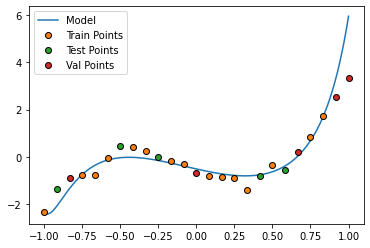

w = 
[[-0.51]
 [-1.45]
 [ 0.67]
 [ 2.92]
 [ 0.13]
 [ 1.76]
 [ 0.13]
 [ 0.88]
 [ 0.17]
 [ 0.4 ]
 [ 0.18]
 [ 0.15]
 [ 0.18]
 [ 0.03]
 [ 0.16]
 [-0.04]
 [ 0.15]
 [-0.08]
 [ 0.14]
 [-0.1 ]
 [ 0.14]
 [-0.11]
 [ 0.13]
 [-0.11]
 [ 0.13]
 [-0.12]]


In [5]:
# weight based regularization
# Lasso: L1 norm regularizer
# Ridge: L2 norm regularizer

# fitting the model
# reg = linear_model.Lasso(alpha=.02, fit_intercept=False)
reg = linear_model.Ridge(alpha=.05, fit_intercept=False)

reg.fit(Xtrain,ytrain)
w = reg.coef_

# training error
yhat = reg.predict(Xtrain)
RMSE = np.sqrt( np.mean((ytrain-yhat)**2) )
print("Train RMSE = %.4f" % RMSE)

# validation error
Xval = design_matrix(xval, M)
yhat = reg.predict(Xval)
RMSE = np.sqrt( np.mean((yval-yhat)**2) )
print("Val RMSE = %.4f" % RMSE)

# plotting
x_line = np.linspace(-1,1,500).reshape(-1,1)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.plot(xval,yval,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points', 'Val Points'])
plt.show()

print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

In [6]:
# test error
Xtest = design_matrix(xtest, M)
yhat = reg.predict(Xtest)
RMSE = np.sqrt(np.mean((ytest-yhat)**2))
print("Test RMSE = %.4f" % RMSE)

Test RMSE = 0.4004
